In [129]:
import pandas as pd
import numpy as np

In [130]:
dt_data=pd.read_excel('DT.xlsx')

In [131]:
dt_data.head()

,Past Trend,Open Interest,Trading Volume,Return
0,Positive,Low,High,Up
1,Negative,High,Low,Down
2,Positive,Low,High,Up
3,Positive,High,High,Up
4,Negative,Low,High,Down


In [132]:
# Finding the Root Node using GINI impurity

In [133]:
# Gini for Past Trend
pt_prob=(dt_data['Past Trend'].value_counts()/len(dt_data))
#pt_prob.columns=['Past Trend','Prob']
pt_prob

Positive    0.6
Negative    0.4
Name: Past Trend, dtype: float64

In [134]:
pt_cross_count=pd.crosstab(dt_data['Return'],dt_data['Past Trend'])
pt_cross_count

Past Trend,Negative,Positive
Return,,
Down,4,2
Up,0,4


In [135]:
dt_pt_c1=len(dt_data[(dt_data['Past Trend']=='Positive') & (dt_data['Return']=='Up')])
dt_pt_c2=len(dt_data[(dt_data['Past Trend']=='Positive') & (dt_data['Return']=='Down')])

p11=dt_pt_c1/dt_data['Past Trend'].value_counts()['Positive']


p12=dt_pt_c2/dt_data['Past Trend'].value_counts()['Positive']

In [136]:
gini_pt1=1 - p11**2 -p12**2
gini_pt1

0.4444444444444445

In [137]:
dt_pt_c1=len(dt_data[(dt_data['Past Trend']=='Negative') & (dt_data['Return']=='Up')])
dt_pt_c2=len(dt_data[(dt_data['Past Trend']=='Negative') & (dt_data['Return']=='Down')])

p11=dt_pt_c1/dt_data['Past Trend'].value_counts()['Negative']


p12=dt_pt_c2/dt_data['Past Trend'].value_counts()['Negative']

In [138]:
gini_pt2=1 - p11**2 -p12**2
gini_pt2

0.0

In [141]:
gini_pt=pt_prob['Positive']*gini_pt1 + pt_prob['Negative']*gini_pt2
gini_pt

0.26666666666666666

In [146]:
def gini_impurity1(dt_data,col_name):
    p1=[]
    lev=dt_data[col_name].unique()
    for i in lev:
        p=[]
        dt_data[col_name].unique()
        pt_prob=(dt_data[col_name].value_counts()/len(dt_data))
        dt_pt_c1=[len(dt_data[(dt_data[col_name]==i) & (dt_data['Return']==j)]) for j in out_lev]
        p.append(dt_pt_c1/dt_data[col_name].value_counts()[i])
        p1.append(1-np.sum(np.array(p)**2))
    return(np.sum(pd.Series(p1)*pt_prob.reset_index(drop=True)))


In [147]:
inp=dt_data.drop('Return',axis=1)
for i in inp.columns:
    print(gini_impurity1(dt_data,i))

0.26666666666666666
0.4666666666666667
0.3428571428571429


In [148]:
dt_data1=dt_data[dt_data['Past Trend']=='Positive']
dt_data2=dt_data[dt_data['Past Trend']=='Negative']

In [152]:
inp=dt_data1.drop(['Return','Past Trend'],axis=1)
for i in inp.columns:
    print(i)
    print(gini_impurity1(dt_data1,i))

Open Interest
0.3333333333333333
Trading Volume
0.0


In [150]:
inp.columns

Index(['Past Trend', 'Open Interest', 'Trading Volume'], dtype='object')

In [155]:
inp=dt_data2.drop(['Return','Past Trend'],axis=1)
for i in inp.columns:
    print(i)
    print(gini_impurity1(dt_data2,i))

Open Interest
0.0
Trading Volume
0.0


In [158]:
inp=dt_data.drop('Return',1)
out=dt_data['Return']

inp_dum=pd.get_dummies(inp, drop_first=True)


In [159]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(inp_dum,out)
pred=dt.predict(inp_dum)

In [160]:
pred

array(['Up', 'Down', 'Up', 'Up', 'Down', 'Down', 'Down', 'Down', 'Down',
       'Up'], dtype=object)

In [165]:
dt.decision_path

<bound method BaseDecisionTree.decision_path of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>

[Text(133.92000000000002, 181.2, 'X[0] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

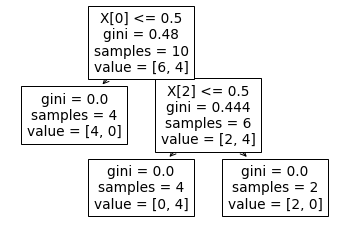

In [172]:
from sklearn import tree
tree.plot_tree(dt)

In [250]:
data=pd.read_csv('Loan_data.csv')

In [251]:
data.isnull().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [252]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [253]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])

In [254]:
data['Gender'].isnull().sum()

0

In [255]:
data['Married']=data['Married'].fillna(data['Married'].mode()[0])

In [256]:
data['Married'].isnull().sum()

0

In [257]:
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Married'].isnull().sum()

0

In [258]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [259]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [260]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [261]:
data['Credit_History']=data['Credit_History'].fillna('first_timer')

In [262]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [263]:
loan_id=data['Loan_ID']
out=data['Loan_Status']
inp=data.drop(['Loan_ID','Loan_Status'],1)

In [264]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
inp['Dependents1']=le.fit_transform(inp['Dependents'])
inp[['Dependents','Dependents1']]

,Dependents,Dependents1
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
609,0,0
610,3+,3
611,1,1
612,2,2


In [265]:
#data['PropertyArea1']=le.fit_transform(data['Property_Area'])
#data[['Property_Area','PropertyArea1']]
inp['PropertyArea2']=inp['Property_Area'].replace({'Urban':0,'Semiurban':1,'Rural':2})

In [266]:
inp.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Dependents1',
       'PropertyArea2'],
      dtype='object')

In [267]:
inp=inp.drop(['Dependents','Property_Area'],1)


In [268]:
inp=pd.get_dummies(inp)
inp.shape

(614, 17)

In [269]:
#out=out.replace({'Y':1,'N':0})

In [270]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.25,random_state=48)

In [271]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()
dt1.fit(xtrain,ytrain)
ypred=dt1.predict(xtest)

In [285]:
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,plot_roc_curve,auc

In [273]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           N       0.49      0.39      0.43        51
           Y       0.73      0.80      0.76       103

    accuracy                           0.66       154
   macro avg       0.61      0.59      0.60       154
weighted avg       0.65      0.66      0.65       154



In [274]:
confusion_matrix(ytest,ypred)

array([[20, 31],
       [21, 82]], dtype=int64)

In [275]:
yprob=dt1.predict_proba(xtest)
yprob1=yprob[:,1]

In [300]:
fpr,tpr,th=roc_curve(ytest,yprob[:,1],pos_label='Y')
fpr1,tpr1,th=roc_curve(ytest,yprob[:,0],pos_label='N')

In [298]:
from matplotlib import pyplot as plt

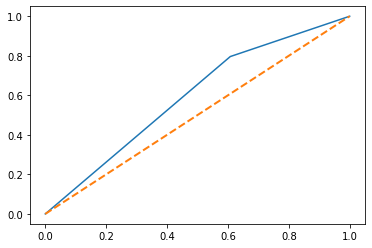

In [299]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--', lw=2)

In [303]:
auc(fpr,tpr)

0.5941366837997335

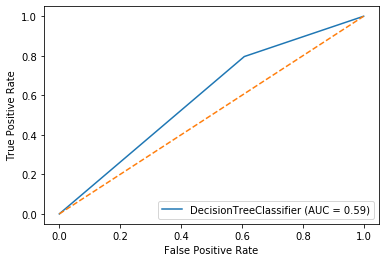

In [288]:
plot_roc_curve(dt1, xtest, ytest) 
plt.plot([0,1],[0,1],'--')

In [295]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [293]:
# for reproducibility purposes
seed = 100
k = 5
sm = SMOTE(sampling_strategy='all', k_neighbors=k, random_state=seed)
inp_bal, out_bal = sm.fit_resample(inp, out)

In [294]:
out_bal.value_counts()

Y    422
N    422
Name: Loan_Status, dtype: int64

In [304]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(inp_bal,out_bal,test_size=0.25,random_state=48)
from sklearn.tree import DecisionTreeClassifier
dt2=DecisionTreeClassifier()
dt2.fit(xtrain,ytrain)
ypred2=dt2.predict(xtest)

In [305]:
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           N       0.80      0.86      0.83       114
           Y       0.82      0.75      0.78        97

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.81      0.81      0.81       211



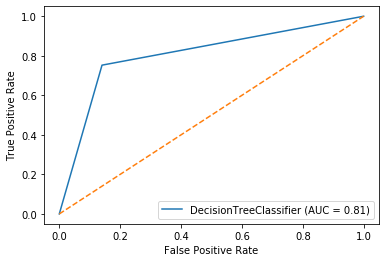

In [306]:
plot_roc_curve(dt2, xtest, ytest) 
plt.plot([0,1],[0,1],'--')

In [357]:
from sklearn.model_selection import cross_val_score,KFold
kfold=KFold(n_splits=3,shuffle=True, random_state=48)
out_bal1=out_bal.replace({'Y':1,'N':0})
score=cross_val_score(dt2,inp_bal,out_bal1,cv=kfold,scoring='f1')
print(np.mean(score))
print(np.std(score))

0.7779025489199238
0.016368907119410168


In [358]:
xtrain,xtest,ytrain,ytest=xtrain,xtest,ytrain,ytest=train_test_split(inp_bal,out_bal1,test_size=0.25,random_state=48)

In [359]:
from sklearn.model_selection import GridSearchCV
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[6,7,8,9,10,11],
          'random_state':[48]}

In [360]:
dt_hyp = GridSearchCV(dt2, param_grid=params, n_jobs=-1, scoring='f1')

In [361]:
dt_hyp.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
          

In [362]:
dt_hyp.best_score_

0.7786948721159305

In [363]:
dt_hyp.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 14,
 'random_state': 48}

In [364]:
final_dt=DecisionTreeClassifier(**dt_hyp.best_params_)

In [365]:
final_dt.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=48, splitter='best')

In [366]:
ypred1=final_dt.predict(xtest)
ypred2=final_dt.predict(xtrain)

In [367]:
print(classification_report(ytest,ypred1))
print(classification_report(ytrain,ypred2))

              precision    recall  f1-score   support

           0       0.85      0.75      0.79       114
           1       0.74      0.85      0.79        97

    accuracy                           0.79       211
   macro avg       0.79      0.80      0.79       211
weighted avg       0.80      0.79      0.79       211

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       308
           1       0.82      0.88      0.85       325

    accuracy                           0.84       633
   macro avg       0.84      0.84      0.84       633
weighted avg       0.84      0.84      0.84       633



In [ ]:
mod=LinearRegression()
mod.fit(xtrain,ytrain)
ypred_train=mod.predict(xtrain)
rmse_train=mean_sqaured_error(ytrain,ypred_train) # Bias error

ypred_test=mod.predict(yxtest)
rmse_test=mean_sqaured_error(ytest,ypred_test) # testing stage error

Variance = Rmse_train-rmse_test ---- more then your model variance is high (overfitting)
                                     less (not overfitting , but make sure that it is not underfittign either)
                                     